In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

colors = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
        '#1a55FF', '#55a8ff', '#6df7fd', '#f2ad92', '#d96459',
        '#f2a541', '#f2d83d', '#b2d732', '#33d9b2', '#127475',
        '#004777'
    ]


grouped_df_dept = pd.read_csv("/Users/sofi/Documents/4thyear/CS506/ds-boston-city-budget/fa23-team-f/data/grouped_df_dept.csv")
grouped_df_dept

,Neighborhood,PM_Department,Total_Project_Budget
0,Allston/Brighton,Parks and Recreation Department,7480000.0
1,Allston/Brighton,Public Facilities Department,35125000.0
2,Allston/Brighton,Public Works Department,15000000.0
3,Back Bay,Boston Public Library,400000.0
4,Back Bay,Boston Transportation Department,9876299.0
...,...,...,...
82,West End,Public Facilities Department,3000000.0
83,West End,Public Works Department,2000000.0
84,West Roxbury,Boston Transportation Department,400000.0
85,West Roxbury,Parks and Recreation Department,9475000.0


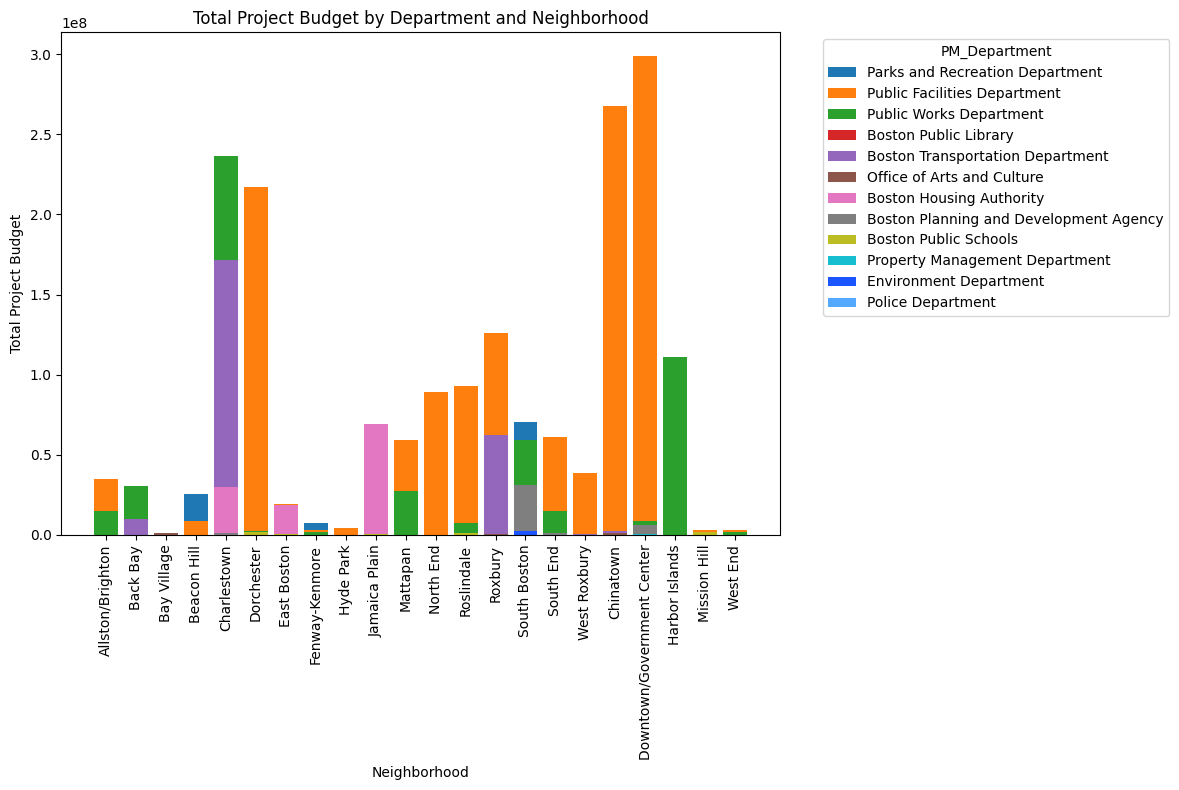

In [10]:
plt.figure(figsize=(12, 8))
for i, department in enumerate(grouped_df_dept['PM_Department'].unique()):
    dept_data = grouped_df_dept[grouped_df_dept['PM_Department'] == department]
    plt.bar(dept_data['Neighborhood'], dept_data['Total_Project_Budget'], color=colors[i % len(colors)], label=department)

plt.xlabel('Neighborhood')
plt.ylabel('Total Project Budget')
plt.title('Total Project Budget by Department and Neighborhood')
plt.legend(title='PM_Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

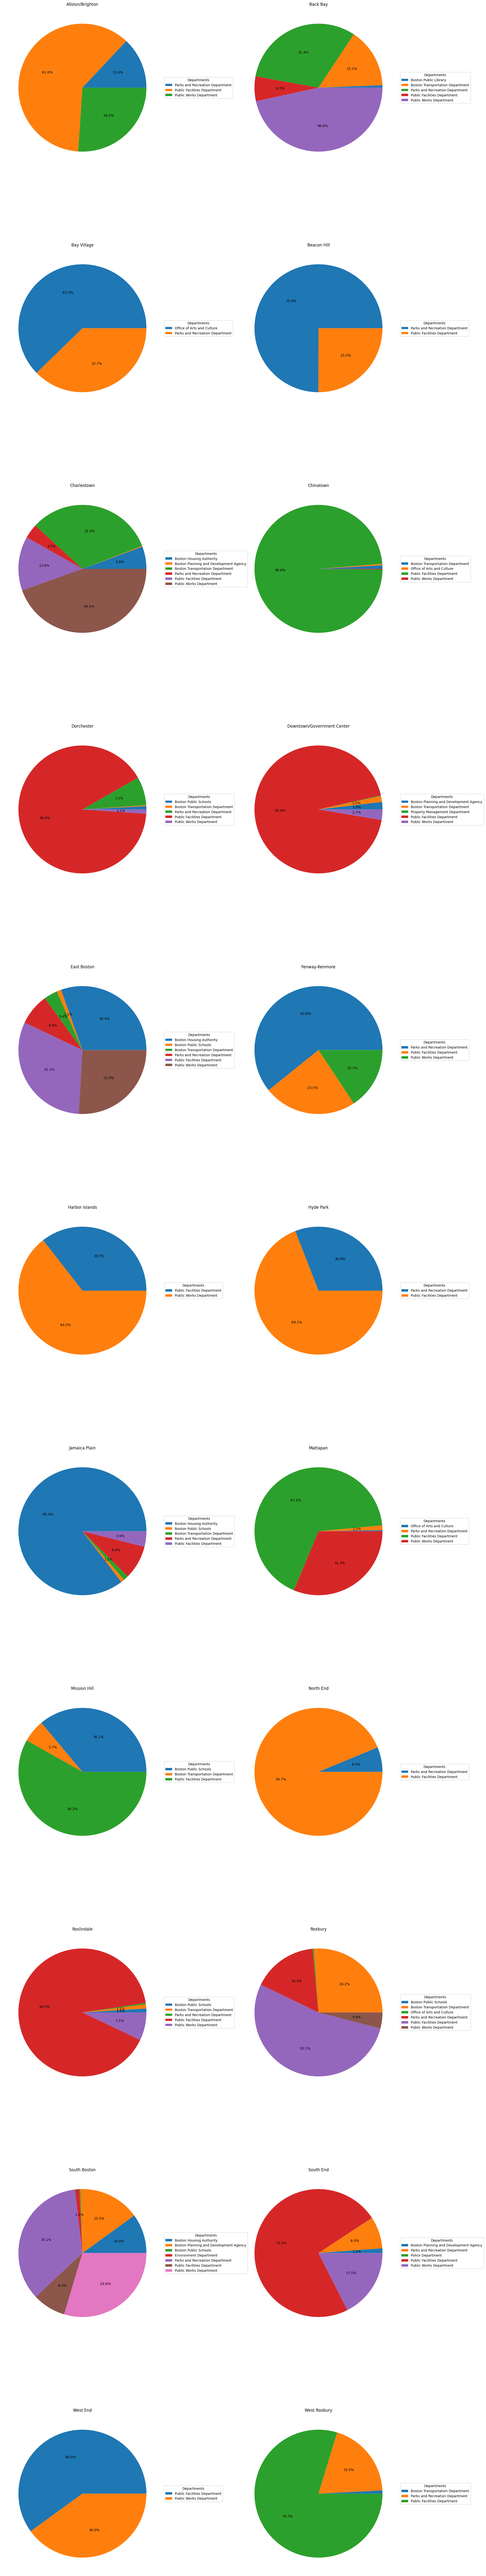

In [11]:
neighborhoods = grouped_df_dept['Neighborhood'].unique()
n_rows = int(np.ceil(len(neighborhoods) / 2))


fig, axs = plt.subplots(n_rows, 2, figsize=(20, n_rows*10))
axs = axs.flatten()

for ax, neighborhood in zip(axs, neighborhoods):
    neighborhood_data = grouped_df_dept[grouped_df_dept['Neighborhood'] == neighborhood]
    percentage = neighborhood_data['Total_Project_Budget'] / neighborhood_data['Total_Project_Budget'].sum() * 100

    def custom_autopct(pct):
        return ('%1.1f%%' % pct) if pct > 0.9 else None
    
    wedges, texts, autotexts = ax.pie(percentage, autopct=custom_autopct)
    ax.set_title(neighborhood)
    ax.legend(wedges, neighborhood_data['PM_Department'], title="Departments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

for i in range(len(neighborhoods), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()